# Midterm 2. Solutions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,export_graphviz 
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.discrete.discrete_model import Logit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("Startup_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 51 columns):
ID                                          234 non-null object
Success                                     234 non-null int64
Company_Location                            234 non-null object
Company_raising_fund                        234 non-null object
Company_Industry_count                      234 non-null object
Company_mobile_app                          234 non-null object
Company_investor_count_seed                 234 non-null int64
Company_investor_count_Angel_VC             234 non-null int64
Company_cofounders_count                    234 non-null int64
Company_advisors_count                      234 non-null int64
Company_senior_team_count                   234 non-null int64
Company_top_Angel_VC_funding                234 non-null object
Company_repeat_investors_count              234 non-null int64
Founders_top_company_experience             234 non-null object
Founde

In [4]:
data.drop("ID",axis=1,inplace=True)

In [5]:
data_num=data.select_dtypes(exclude="object")
data_obj=data.select_dtypes(include="object")

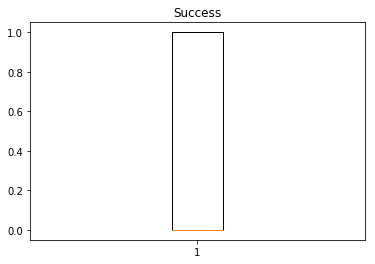

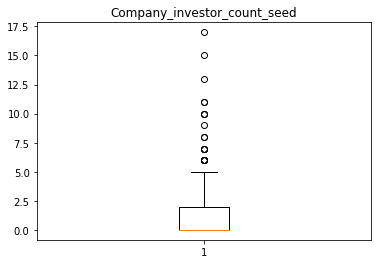

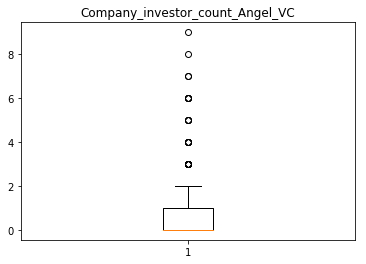

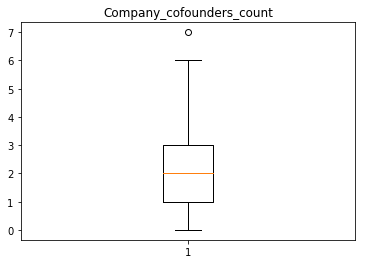

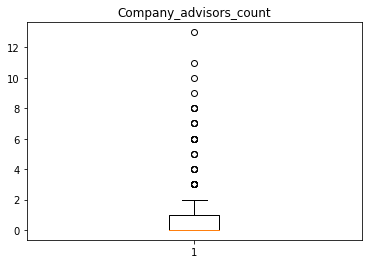

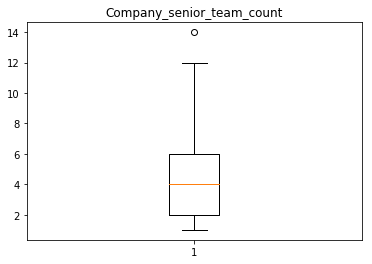

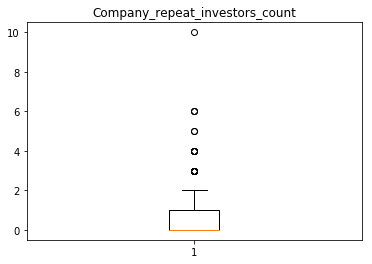

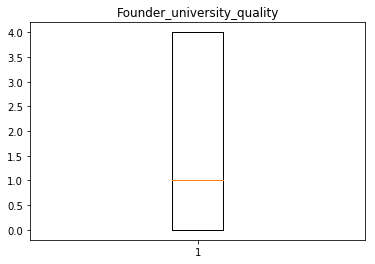

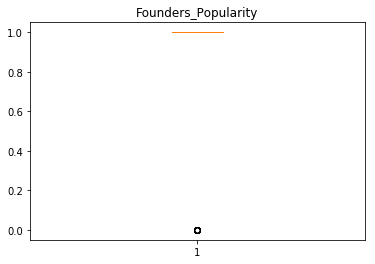

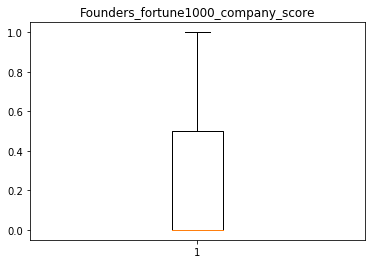

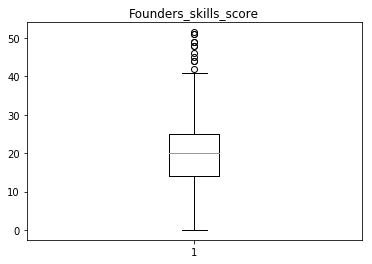

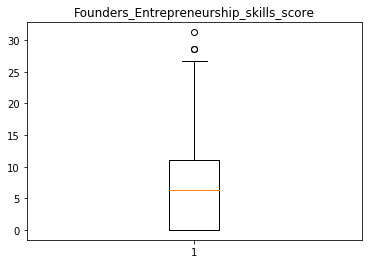

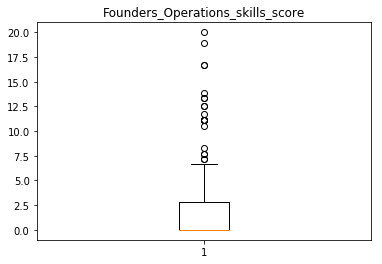

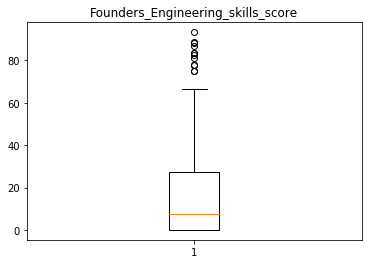

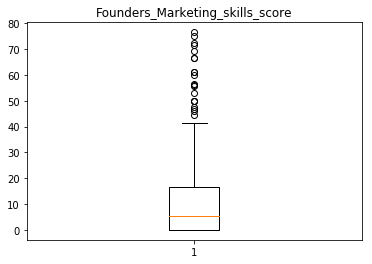

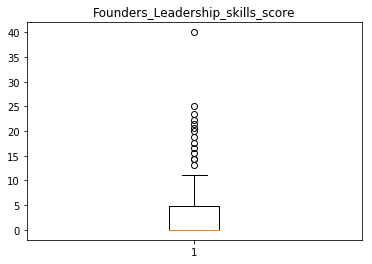

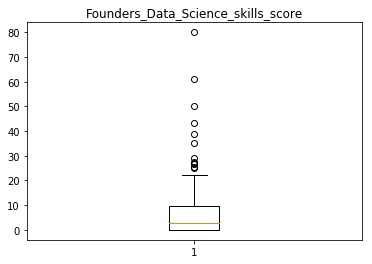

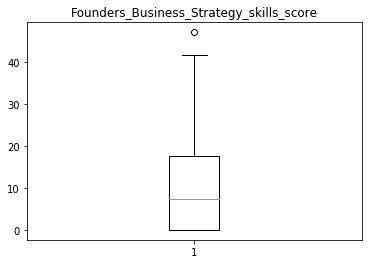

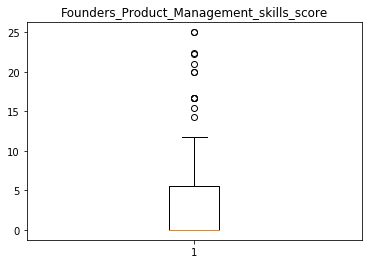

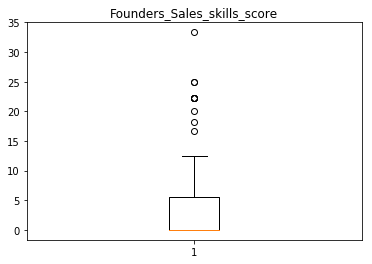

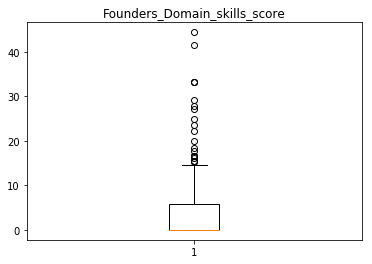

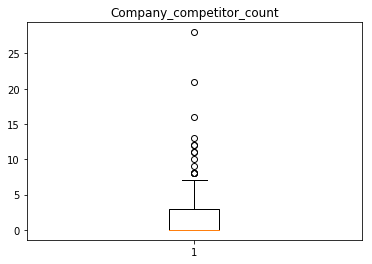

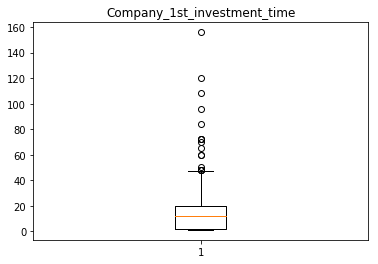

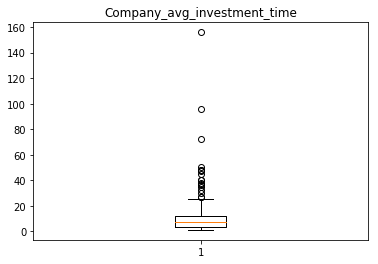

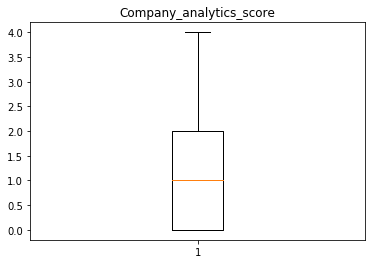

In [7]:
for i in data_num:
    plt.boxplot(data_num[i])
    plt.title(i)
    plt.show()

In [8]:
data_num.Founders_Popularity.value_counts()

1    195
0     39
Name: Founders_Popularity, dtype: int64

In [10]:
data_num.Founders_Popularity.var()

0.13948497854077288

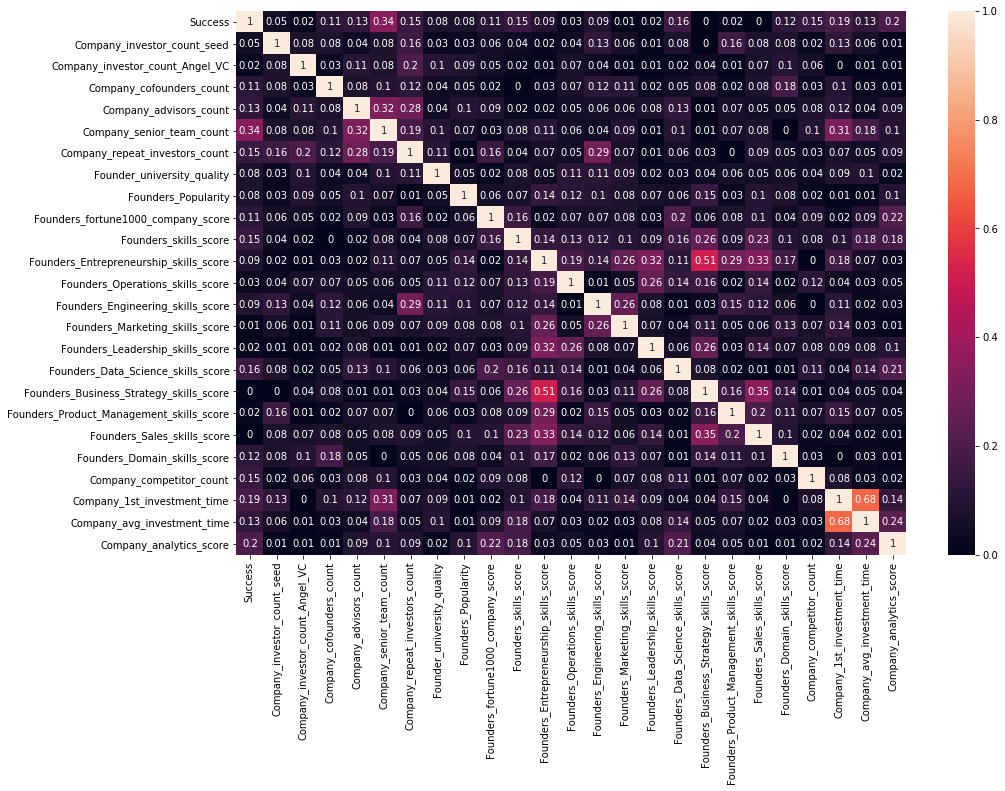

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data_num.corr().abs().round(2),annot=True)
plt.show()

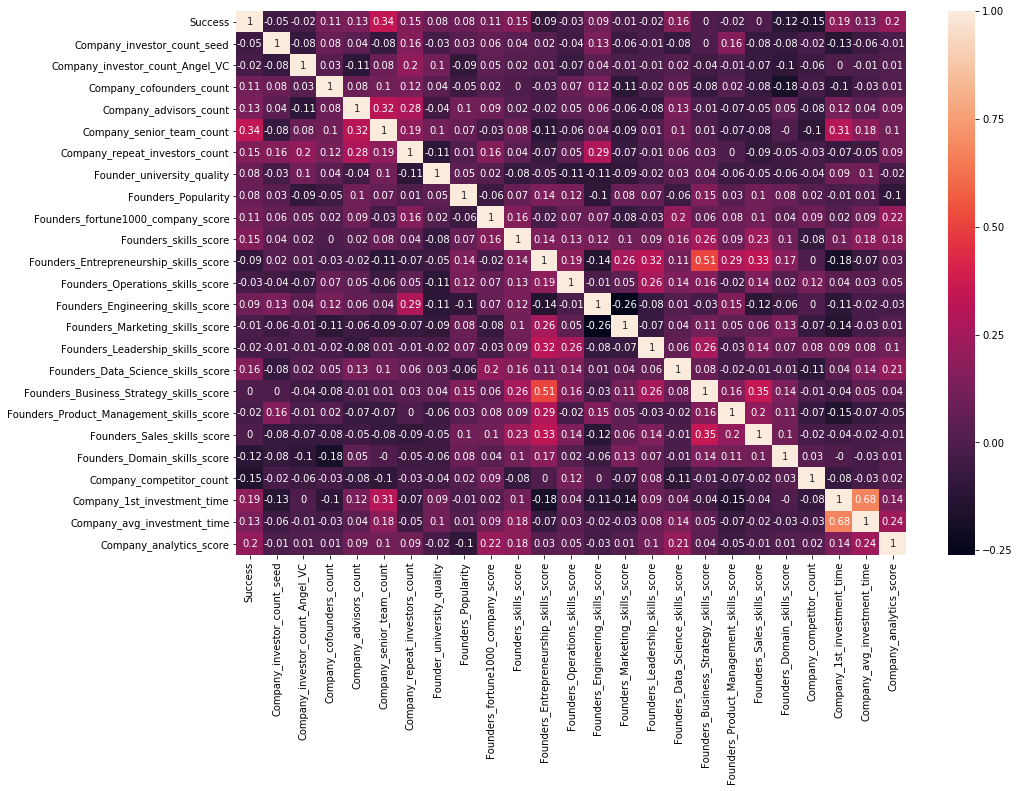

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(data_num.corr().round(2),annot=True)
plt.show()

In [14]:
data.Company_Location.value_counts()

USA       179
Europe     42
Other      13
Name: Company_Location, dtype: int64

In [15]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 25 columns):
Success                                     234 non-null int64
Company_investor_count_seed                 234 non-null int64
Company_investor_count_Angel_VC             234 non-null int64
Company_cofounders_count                    234 non-null int64
Company_advisors_count                      234 non-null int64
Company_senior_team_count                   234 non-null int64
Company_repeat_investors_count              234 non-null int64
Founder_university_quality                  234 non-null int64
Founders_Popularity                         234 non-null int64
Founders_fortune1000_company_score          234 non-null float64
Founders_skills_score                       234 non-null float64
Founders_Entrepreneurship_skills_score      234 non-null float64
Founders_Operations_skills_score            234 non-null float64
Founders_Engineering_skills_score           234 non-null float64
Fou

In [18]:
formula="Success~"+"+".join(data_num.iloc[:,1:].columns)
formula

'Success~Company_investor_count_seed+Company_investor_count_Angel_VC+Company_cofounders_count+Company_advisors_count+Company_senior_team_count+Company_repeat_investors_count+Founder_university_quality+Founders_Popularity+Founders_fortune1000_company_score+Founders_skills_score+Founders_Entrepreneurship_skills_score+Founders_Operations_skills_score+Founders_Engineering_skills_score+Founders_Marketing_skills_score+Founders_Leadership_skills_score+Founders_Data_Science_skills_score+Founders_Business_Strategy_skills_score+Founders_Product_Management_skills_score+Founders_Sales_skills_score+Founders_Domain_skills_score+Company_competitor_count+Company_1st_investment_time+Company_avg_investment_time+Company_analytics_score'

In [19]:
logit1=Logit.from_formula(formula=formula,data=data_num).fit()

Optimization terminated successfully.
         Current function value: 0.555748
         Iterations 6


In [20]:
logit1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                     Results: Logit
========================================================================================
Model:                       Logit                    No. Iterations:           6.0000  
Dependent Variable:          Success                  Pseudo R-squared:         0.198   
Date:                        2018-12-01 15:51         AIC:                      310.0901
No. Observations:            234                      BIC:                      396.4732
Df Model:                    24                       Log-Likelihood:           -130.05 
Df Residuals:                209                      LL-Null:                  -162.19 
Converged:                   1.0000                   Scale:                    1.0000  
----------------------------------------------------------------------------------------
                                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------------------------
Intercept                                -3.0481   0.7489 -4.0699 0.0000 -4.5160 -1.5802
Company_investor_count_seed              -0.0584   0.0558 -1.0469 0.2951 -0.1678  0.0510
Company_investor_count_Angel_VC          -0.1549   0.0960 -1.6137 0.1066 -0.3431  0.0332
Company_cofounders_count                  0.1481   0.1372  1.0791 0.2805 -0.1209  0.4170
Company_advisors_count                   -0.0447   0.0811 -0.5510 0.5816 -0.2036  0.1143
Company_senior_team_count                 0.2737   0.0774  3.5339 0.0004  0.1219  0.4255
Company_repeat_investors_count            0.1867   0.1277  1.4622 0.1437 -0.0636  0.4369
Founder_university_quality                0.1033   0.0884  1.1677 0.2429 -0.0701  0.2766
Founders_Popularity                       0.6971   0.4415  1.5787 0.1144 -0.1683  1.5625
Founders_fortune1000_company_score        0.4371   0.4441  0.9842 0.3250 -0.4334  1.3076
Founders_skills_score                     0.0177   0.0160  1.1033 0.2699 -0.0137  0.0490
Founders_Entrepreneurship_skills_score   -0.0238   0.0318 -0.7500 0.4533 -0.0861  0.0384
Founders_Operations_skills_score         -0.0433   0.0469 -0.9244 0.3553 -0.1352  0.0486
Founders_Engineering_skills_score         0.0075   0.0074  1.0222 0.3067 -0.0069  0.0220
Founders_Marketing_skills_score           0.0101   0.0097  1.0381 0.2992 -0.0089  0.0290
Founders_Leadership_skills_score         -0.0001   0.0325 -0.0029 0.9976 -0.0637  0.0636
Founders_Data_Science_skills_score        0.0230   0.0189  1.2185 0.2230 -0.0140  0.0601
Founders_Business_Strategy_skills_score  -0.0004   0.0192 -0.0192 0.9847 -0.0380  0.0373
Founders_Product_Management_skills_score  0.0148   0.0344  0.4290 0.6679 -0.0527  0.0823
Founders_Sales_skills_score               0.0225   0.0336  0.6707 0.5024 -0.0433  0.0884
Founders_Domain_skills_score             -0.0477   0.0218 -2.1903 0.0285 -0.0904 -0.0050
Company_competitor_count                 -0.0743   0.0526 -1.4123 0.1579 -0.1774  0.0288
Company_1st_investment_time               0.0201   0.0125  1.6007 0.1094 -0.0045  0.0447
Company_avg_investment_time              -0.0096   0.0181 -0.5271 0.5981 -0.0451  0.0260
Company_analytics_score                   0.3442   0.1609  2.1393 0.0324  0.0289  0.6594
========================================================================================

"""

In [21]:
logit1.pvalues[logit1.pvalues<0.05]

Intercept                       0.000047
Company_senior_team_count       0.000410
Founders_Domain_skills_score    0.028501
Company_analytics_score         0.032410
dtype: float64

In [22]:
logit1.get_margeff().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                Success
Method:                          dydx
At:                           overall
============================================================================================================
                                              dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Company_investor_count_seed                 -0.0110      0.010     -1.055      0.291      -0.031       0.009
Company_investor_count_Angel_VC             -0.0292      0.018     -1.645      0.100      -0.064       0.006
Company_cofounders_count                     0.0279      0.026      1.088      0.277      -0.022       0.078
Company_advisors_count                      -0.0084      0.015     -0.552      0.581      -0.038       0.021
Company_senior_team_count                    0.0516      0.013      3.920      0.000       0.026       0.077
Company_repeat_investors_count               0.0352      0.024      1.486      0.137      -0.011       0.082
Founder_university_quality                   0.0195      0.017      1.179      0.238      -0.013       0.052
Founders_Popularity                          0.1315      0.082      1.609      0.108      -0.029       0.292
Founders_fortune1000_company_score           0.0825      0.083      0.992      0.321      -0.081       0.245
Founders_skills_score                        0.0033      0.003      1.114      0.265      -0.003       0.009
Founders_Entrepreneurship_skills_score      -0.0045      0.006     -0.753      0.451      -0.016       0.007
Founders_Operations_skills_score            -0.0082      0.009     -0.930      0.352      -0.025       0.009
Founders_Engineering_skills_score            0.0014      0.001      1.031      0.303      -0.001       0.004
Founders_Marketing_skills_score              0.0019      0.002      1.047      0.295      -0.002       0.005
Founders_Leadership_skills_score         -1.805e-05      0.006     -0.003      0.998      -0.012       0.012
Founders_Data_Science_skills_score           0.0043      0.004      1.231      0.218      -0.003       0.011
Founders_Business_Strategy_skills_score  -6.949e-05      0.004     -0.019      0.985      -0.007       0.007
Founders_Product_Management_skills_score     0.0028      0.006      0.430      0.668      -0.010       0.016
Founders_Sales_skills_score                  0.0043      0.006      0.673      0.501      -0.008       0.017
Founders_Domain_skills_score                -0.0090      0.004     -2.271      0.023      -0.017      -0.001
Company_competitor_count                    -0.0140      0.010     -1.434      0.152      -0.033       0.005
Company_1st_investment_time                  0.0038      0.002      1.630      0.103      -0.001       0.008
Company_avg_investment_time                 -0.0018      0.003     -0.528      0.597      -0.009       0.005
Company_analytics_score                      0.0649      0.029      2.216      0.027       0.008       0.122
============================================================================================================
"""

In [23]:
data_dummy=pd.get_dummies(data_obj,drop_first=True,prefix=data_obj.columns)

In [24]:
data_final=data_dummy.join(data_num)
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 64 columns):
Company_Location_Other                             234 non-null uint8
Company_Location_USA                               234 non-null uint8
Company_raising_fund_Yes                           234 non-null uint8
Company_Industry_count_Many                        234 non-null uint8
Company_Industry_count_single                      234 non-null uint8
Company_mobile_app_Yes                             234 non-null uint8
Company_top_Angel_VC_funding_Yes                   234 non-null uint8
Founders_top_company_experience_Yes                234 non-null uint8
Founders_previous_company_employee_count_Medium    234 non-null uint8
Founders_previous_company_employee_count_Small     234 non-null uint8
Founders_startup_experience_Yes                    234 non-null uint8
Founders_big_5_experience_Yes                      234 non-null uint8
Company_business_model_B2C                         234 

In [25]:
X=data_final.drop("Success",axis=1)
Y=data_final.Success
X_train,X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [26]:
Y.value_counts()/len(Y)

0    0.504274
1    0.495726
Name: Success, dtype: float64

In [29]:
grids_tree=GridSearchCV(DecisionTreeClassifier(random_state=42,class_weight='balanced'),
                        param_grid={"max_depth":range(3,10),"min_samples_leaf":range(20,70)},
                        cv=5,n_jobs=-1,scoring="roc_auc").fit(X,Y)
grids_logit=GridSearchCV(LogisticRegression(random_state=42,class_weight='balanced'),
                        param_grid={"C":np.linspace(0.00001,20,10),"penalty":["l1","l2"]},
                         cv=5,n_jobs=-1,scoring="roc_auc").fit(X,Y)

In [30]:
print("tree best params:",grids_tree.best_params_)
print("logit best params:",grids_logit.best_params_)

tree best params: {'max_depth': 3, 'min_samples_leaf': 50}
logit best params: {'C': 1e-05, 'penalty': 'l2'}


In [34]:
best=list(grids_logit.best_params_.values())[0]
best

1e-05

In [35]:
tree=DecisionTreeClassifier(random_state=42,class_weight='balanced',max_depth=3,min_samples_leaf=50).fit(X_train,Y_train)
logit=LogisticRegression(random_state=42,class_weight='balanced',C=best,penalty="l2").fit(X_train,Y_train)

In [37]:
scores.items()

dict_items([('Recall', <function recall_score at 0x00000253076C4F28>), ('ROC_AUC', <function roc_auc_score at 0x00000253076BBF28>), ('Accuracy', <function accuracy_score at 0x00000253076C4950>)])

In [42]:
model.items()

dict_items([('tree', DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')), ('logit', LogisticRegression(C=1e-05, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [57]:
#Train
model={"tree":tree,"logit":logit}
scores={"Recall": recall_score,"ROC_AUC":roc_auc_score,"Accuracy":accuracy_score}
for score_names,scores in scores.items():
    print("\n",score_names)
    for model_names, models in model.items():
        print(model_names,scores(Y_train,models.predict(X_train)).round(2)*100)


 Recall
tree 59.0
logit 94.0

 ROC_AUC
tree 67.0
logit 52.0

 Accuracy
tree 67.0
logit 52.0


In [58]:
#Test
model={"tree":tree,"logit":logit}
scores={"Recall": recall_score,"ROC_AUC":roc_auc_score,"Accuracy":accuracy_score}
for score_names,scores in scores.items():
    print("\n",score_names)
    for model_names, models in model.items():
        print(model_names,scores(Y_test,models.predict(X_test)).round(2)*100)


 Recall
tree 48.0
logit 93.0

 ROC_AUC
tree 56.99999999999999
logit 52.0

 Accuracy
tree 57.99999999999999
logit 51.0


In [61]:
print("mean cross val score tree:",np.mean(cross_val_score(tree,X,Y,cv=5,n_jobs=-1,scoring="roc_auc")))
print("mean cross val score logit:",np.mean(cross_val_score(logit,X,Y,cv=5,n_jobs=-1,scoring="roc_auc")))

mean cross val score tree: 0.612229245431632
mean cross val score logit: 0.5961930266750682


In [69]:
pd.DataFrame(tree.feature_importances_,index=X.columns).sort_values(by=0,ascending=False).head(10)

,0
Company_senior_team_count,0.785561
Founders_previous_company_employee_count_Small,0.214439
Company_Location_Other,0.000000
Founders_fortune1000_company_score,0.000000
Founder_highest_degree_type_Science,0.000000
Founder_highest_degree_type_Technology,0.000000
Company_difficulty_obtaining_workforce_Low,0.000000
Company_difficulty_obtaining_workforce_Medium,0.000000
Company_Founder_Patent_Yes,0.000000
Company_investor_count_seed,0.000000


In [72]:
confusion_matrix(Y_test,tree.predict(X_test)).T

array([[20, 15],
       [10, 14]], dtype=int64)

In [86]:
logit.predict((X_test.iloc[-1,:]).reshape(1, -1))

C:\Users\ADStudent\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


array([1], dtype=int64)

In [87]:
Y_test.iloc[-1]

1